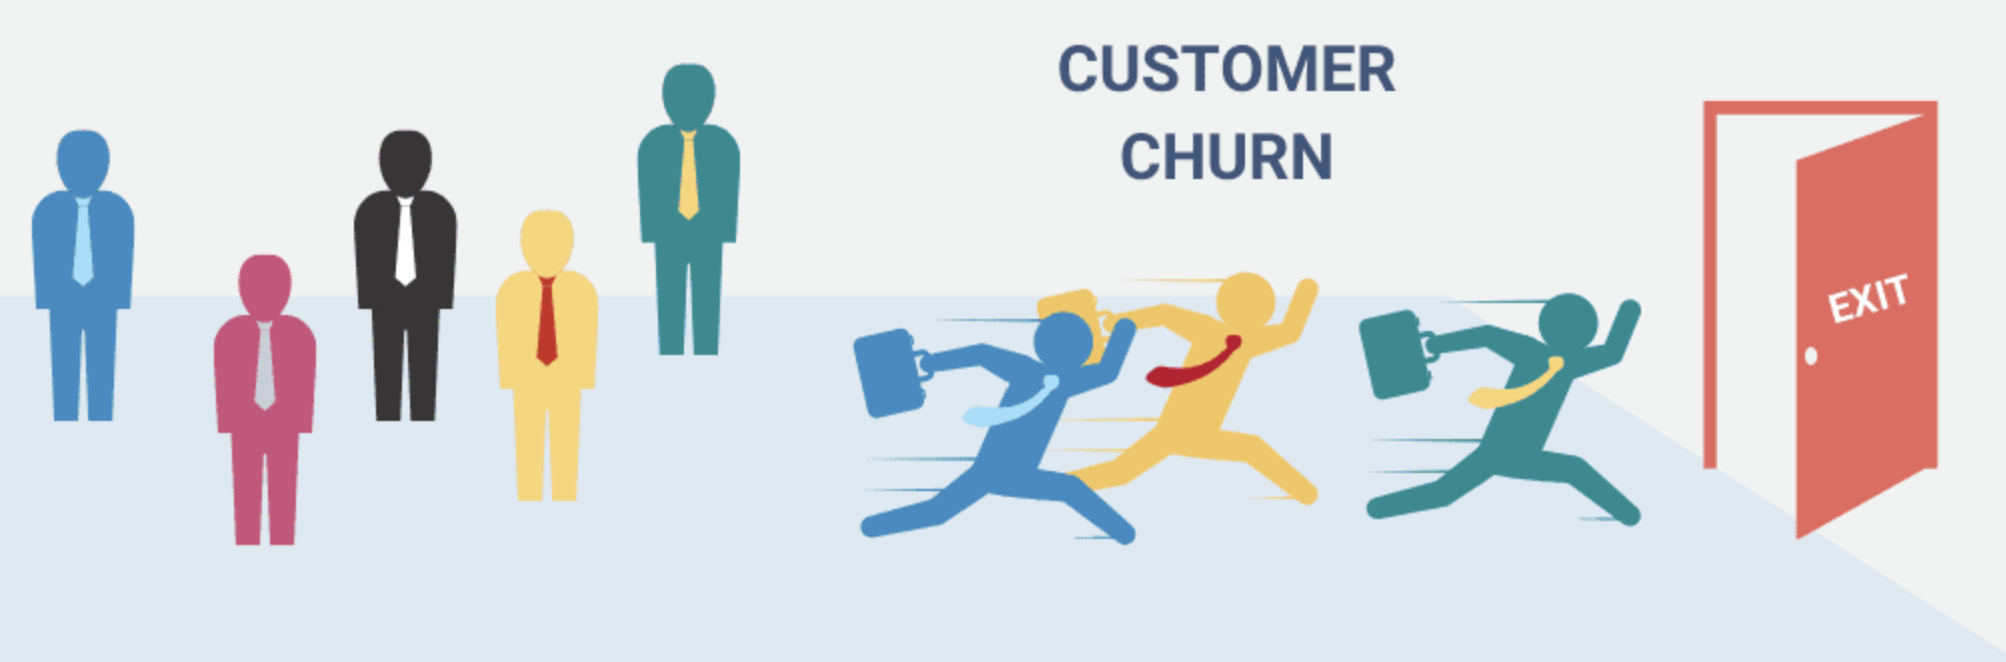

Dans ce projet, ous explorerons un ensemble de données d'une entreprise de télécommunication et créerons un modèle dans le but de prédire les clients présentant un risque de désabonnement plus élevé. Nous utiliserons différents algorithmes de machine learning afin de comparer leurs performances puis nous choisirons le meilleur modèle

# Importation des outils nécessaires

Pour réaliser ce projet, nous aurons besoin de plusieurs librairies et fonctions Python.

Nous importerons NumPy et Pandas, qui sont des outils incontournables en data science. Pandas est particulièrement célèbre pour l'analyse de données avec Python, tandis que NumPy est excellent pour les calculs algébriques et scientifiques rapides.

Nous importerons également Seaborn et Matplotlib pour créer des graphiques d'analyse de nos données.

La librairie ipywidgets sera utilisée pour créer des graphiques interactifs, rendant le notebook plus interactif pour l'utilisateur.

Pour le prétraitement des données, nous utiliserons la fonction MinMaxScaler pour la normalisation des données, car certains algorithmes de machine learning exigent des données normalisées ou standardisées.

Nous aurons également besoin de la fonction train_test_split pour diviser notre ensemble de données en trois parties : un ensemble pour entraîner l'algorithme, un pour valider le modèle, et un pour tester le modèle. 

La fonction RandomSampler nous permettra de rééchantillonner les données. 

Plusieurs algorithmes de machine learning seront utilisés, dont la régression logistique, la forêt aléatoire, le classificateur perceptron multicouche (MLP) (qui est un réseau de neurones artificiel), et le Support Vector Machine (SVM), un classificateur qui cherche le meilleur hyperplan séparant les classes. 

La fonction GridSearchCV nous aidera à trouver les meilleurs hyperparamètres pour nos algorithmes. 

Enfin, pour évaluer les modèles construits, nous utiliserons diverses métriques de classification issues du classification report, telles que la précision et le F1-score. 

Un algorithme de sélection de variables, comme le RFE (Recursive Feature Elimination), sera aussi utilisé pour réduire la dimensionnalité du jeu de données tout en préservant les performances des algorithmes.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE

# Importation des données

In [2]:
df = pd.read_csv('Data-Telecom-Customer-Churn.csv')  
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


On remarque qu'il n'y as pas de valeurs manquantes. Mais les valeurs manquantes peuvent etre cachées. L'analyse exploratoire des données nous donnera beaucoup plus d'informations sur les données.

*Remarque très important à revoir plus tard* 

On voit que la variable ``TotalCharges`` est considéré comme une chaine de caractère , ce qui ne devrait pas etre le cas dans notre contexte. Si tel est le cas, surememnt dans la colonne ``TotalCharges`` du dataset, on y retrouve des lignes qui présente des valeurs en chaine de caractère (ou vide, puisque le vide est considéré aussi comme chaine de caractère). Une seule présente de chaine de caratère dans une colonne de type float (à priori) change tout.

In [4]:
# Nombre de valeurs uniques pour chaque variable
df.nunique().to_frame(name='Nombre de valeurs uniques').sort_values(by='Nombre de valeurs uniques', ascending=False)    

,Nombre de valeurs uniques
customerID,7043
TotalCharges,6531
MonthlyCharges,1585
tenure,73
PaymentMethod,4
StreamingMovies,3
TechSupport,3
OnlineBackup,3
StreamingTV,3
DeviceProtection,3


Etant donné que la variable **customerID** (identifiant du client) a 7043 valeurs distinctes et que la dataframe contient au total 7043 lignes, alors nous sommes convaincus que chaque ligne de l'ensemble des données représente un unique client.


Effectuons une analyse exploratoire des données afin de mieux les comprendre.

# Analyse Exploratoire des Données (AED/EDA)

## Analyse univariée
Commençons notre analyse exploratoire des données en traçant un graphique de visualisation de chaque variable.

In [5]:
# Variables catégorielles
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
categorical_vars

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [6]:
# Exclure customerID car c'est un identifiant unique
categorical_vars.remove('customerID')
categorical_vars

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

Avec un peut attention, on remarque la variable ``TotalCharges`` fait partir des variables qualitative/catégorielle, ce qui devrait pas être le cas. Cette variable représente le montant total facturé à un client, donc elle est normalement censé être une variable quantitative/numérique. 

Ainsi, il va falloir s'y prendre autrement pour récupérer les variables caégorielles.

On peut récupérer cette liste de variables catégorielles autrement. Remarquons qu'après exécution de ``df.nuniques()`` pour avoir le nombre de valeurs uniques par colonnes, les variables catégorielles se démarquent : ce sont les varaibles qui possèdent moins de 5 valeurs uniques (moins de cinq modalités).

Cette approche écarte donc la variable ``TotalCharges`` qui contient plus de 6000 valeurs uniques.

Pour ce faire, on exécute le code suivant:

In [7]:
# categorical_vars = [var for var in df.columns if df[var].nunique() < 5]
                     #ou
# categorical_vars = df.columns[df.nunique() < 5].tolist()
                     #ou
# categorical_vars = df.nunique()[df.nunique() < 5].index.tolist()
                     #ou
categorical_vars = df.nunique()[df.nunique() < 5].keys().tolist()
categorical_vars

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

Et voilà, on bien tous les variables catégorielles sans oublier une, ni rajouter une variable intrui.

Après avoir déterminer les noms des variables catégorielles, nous allons maintenant créer une fonction qui va nous permettre de construire un graphique à bar pour chacune de ces variables. Et puisqu'elles sont nombreuses, nous allons le faire de manière interactive en utilisant les outils de la bibliothèque ``ipywidgets``.

In [8]:
# Création d'une fonction pour tracer un graphique à bar pour chaque variable catégorielle
def plot_categorical_var(var):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=var, order=df[var].value_counts().index)
    plt.title(f'Répartition de la variable {var}')
    plt.xticks(rotation=0)
    plt.show()
    
# Autrement
# def plot_categorical_var(var):    
#     df[var].value_counts(normalize = True).plot(kind='bar')
#     plt.ylabel('Proportion')
#     plt.title('Distribution de la variable' + str(var))
#     return plt.show()

In [9]:
# Interaction pour tracer les graphiques
interact(plot_categorical_var, var=categorical_vars);

interactive(children=(Dropdown(description='var', options=('gender', 'SeniorCitizen', 'Partner', 'Dependents',…

On peut donc interagir avec le notebook en sélectionnant la variable catégorielle qui nous intéresse afin de visualiser sa distribution à travers le graphique à barre.

Voici quelques informations qu'on peut tirer des graphique ci-dessus:
- **Il y as plus de clients qui ne sont pas désabonnés (plus de 70%) que de clients qui se sont désabonnés (moins de 30%)**.
Donc nous avons un problème de déséquilibre qu'il faudra absolument résoudre car cela peut impacter négativement la performance des modèles de classification qe nous allons construire.
- **la distribution des données entre les différents sexes est à peu près également répartie.**
- **Le nombre de clients qui sont des persones âgées (moins de 20%) est inférieur à celui des clients jeunes (plus de 80%).**
- **La variable *Partner* indique si le client a un partenaire (Yes) ou pas (No). Les deux catégories ont pratiquement la même proportion**

Répétons le même processus pour les variables numériques.
Pour ces variables numériques, nous allons construire un histogramme.

Mais avant de construire un histogramme pour chacune de nos variables quantitatives/numériques ,revenons sur une remarque très important faite plus haut sur le type de la variable ``TotalCharges``.

Alors, inspectons le problème qui se pose au niveau des valeurs de cette variable, tout en faisant un échantillonnement de la variable à plusieurs reprises de façon aléatoire.

In [10]:
# Echantillonnage de la variable 'TotalCharges'
df['TotalCharges'].sample(n=10, random_state=None)

1142      775.3
552     1153.25
1759      415.4
3133    3635.15
6195     305.55
5554     1298.7
5003      834.2
1178    1553.95
5446      19.65
2465      35.25
Name: TotalCharges, dtype: object

Apparemment c'est à cause de la présence d'espace au niveau de la varaiable **TotalCharges** que Pandas la considère comme une variable avec des valeurs de type *object* (Chaîne ce caractère).

Nous allons remplacer ces espaces par des *NaN* (Not a Number) et transformer le type de ses valeurs en *float* (décimal).

In [11]:
# Conversion et remplacement des espaces dans la Variable 'TotalCharges' avec NaN 
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)
  

In [12]:
# Variables numériques
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Création d'une fonction pour tracer un histogramme pour chaque variable numérique
def plot_numerical_var(var):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], bins=30, kde=True)
    plt.title(f'Histogramme de la variable {var}')
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.show()

In [ ]:
# Interaction pour tracer les histogrammes
interact(plot_numerical_var, var=numerical_vars);

interactive(children=(Dropdown(description='var', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value=…

**Remarque:** 

L'histogramme de la variable **TotalCharges** montre qu'elle est asymétrie  (étaler vers la droite, donc une asymétrie positive). Ce qui peut poser de problèmes pour les algorithmes à entrainer.

In [14]:
# Coefficient d'asymétrie de la variable 'TotalCharges'
df['TotalCharges'].skew()

np.float64(0.961642499724251)

Le coefficient d'asymétrie est très proche de 1 (soit 0.96), donc il va falloir dans la partie **pré-traitement** appliquer des fonctions de transformations pour la rendre beaucoup plus symetrie, avant de passer à la **modélisation**.

Passons à la construction d'une fonction de boîte à moustache, et de manière interative voir s'il y a des valeurs abérrantes (Outliers).

In [15]:
# Création d'une fonction de boîte à moustache pour visualiser les valeurs abérrantes
def plot_boxplot(var):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=var)
    plt.title(f'Boîte à moustache de la variable {var}')
    plt.xlabel(var)
    plt.show()
    
# Interaction pour tracer les boîtes à moustache
interact(plot_boxplot, var=numerical_vars);

interactive(children=(Dropdown(description='var', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value=…

Nous remarquons que ces variables continues bien que ne présentebt pas de valeurs aberrantes (outliers) sont très asymétriques, ce qui peut causer des erreurs au niveau des modèles que nous allons construire.

On peut appliquer des fonctions de transformation à ces variables afin de les rendre moins asymétrique.

Nous avons jusque-là une compréhension de la distribution de chaque variable dans le jeu de données.

## Analyse bivariée
Maintenant, faisons des analyses bivariées.

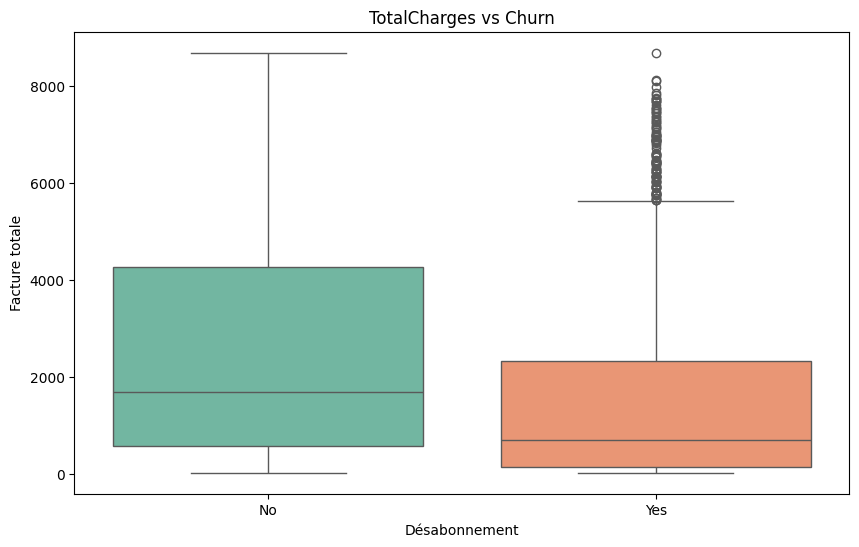

In [16]:
# TotalCharges VS Churn

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df, hue='Churn', palette='Set2')
plt.title('TotalCharges vs Churn')
plt.xlabel('Désabonnement')
plt.ylabel('Facture totale')
plt.show()

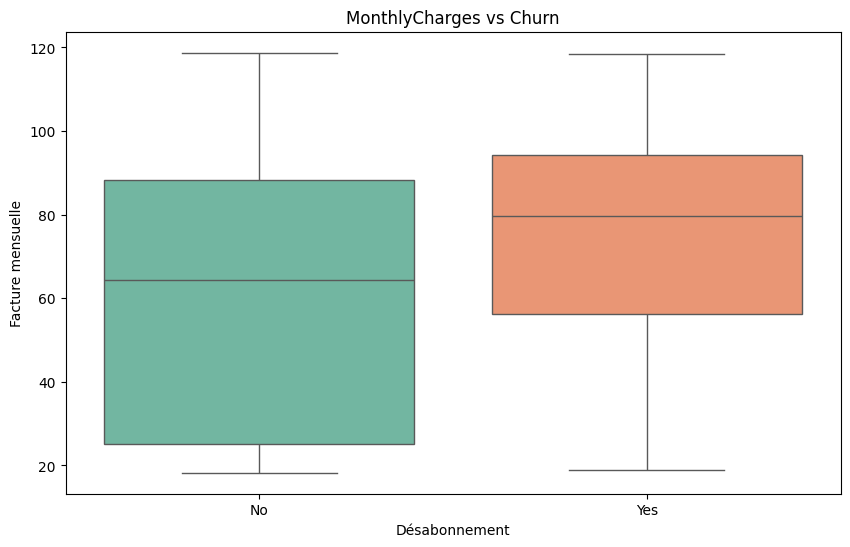

In [17]:
# MonthlyCharges VS Churn

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, hue='Churn', palette='Set2')
plt.title('MonthlyCharges vs Churn')
plt.xlabel('Désabonnement')
plt.ylabel('Facture mensuelle')
plt.show()

Le montant total facturé aux clients qui ont résilié leur contrat est inférieur au montant total facturé aux clients qui ne l'ont pas fait. **Mais, les clients qui se sont désabonnés sont plus facturés mensuellement que les clients qui ne sont pas désabonnés.** Cette information est très importante pour l'entreprise car le montant facturé mensuellement peut-être un facteur important qui détermine si un client va se désabonner.

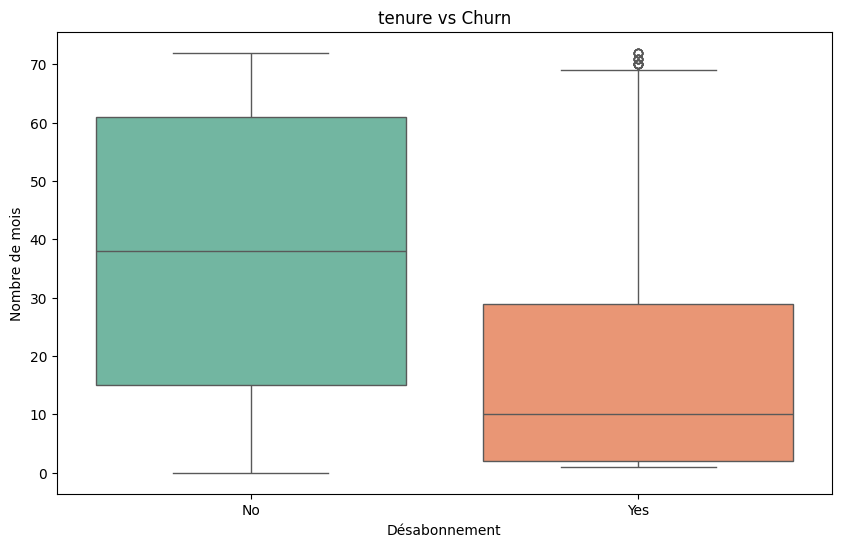

In [18]:
# tenure VS Churn

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='tenure', hue='Churn', palette='Set2')
plt.title('tenure vs Churn')
plt.xlabel('Désabonnement')
plt.ylabel('Nombre de mois')
plt.show()

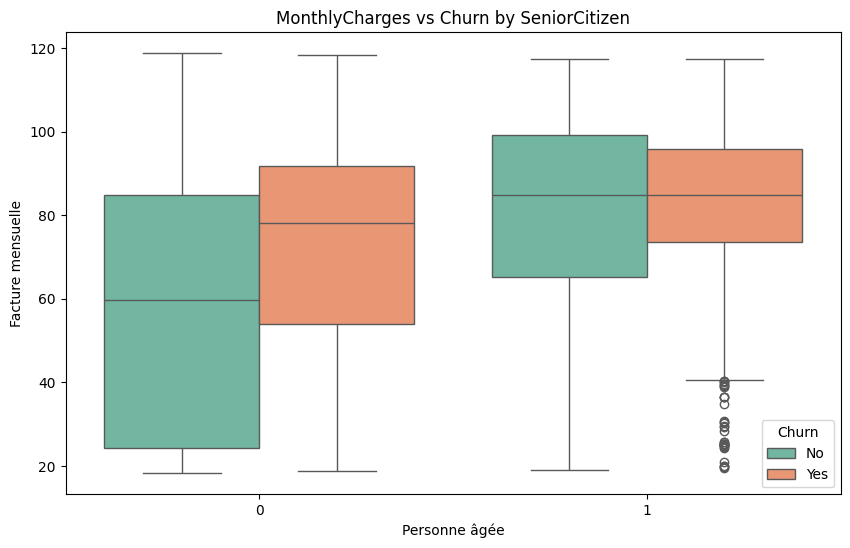

In [19]:
# MonthlyCharges VS Churn by SeniorCitizen
plt.figure(figsize=(10, 6))
sns.boxplot(x='SeniorCitizen', y='MonthlyCharges', hue='Churn', data=df, palette='Set2')
plt.title('MonthlyCharges vs Churn by SeniorCitizen')
plt.xlabel('Personne âgée')
plt.ylabel('Facture mensuelle')
plt.show()

Il semble que les personnes âgées soient beaucoup plus facturées mensuellement que les jeunes.

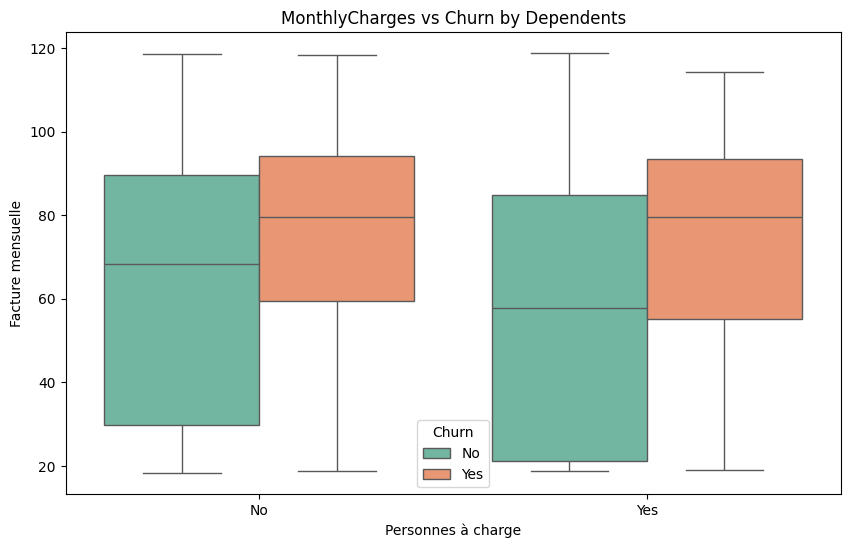

In [20]:
# MonthlyCharges VS Churn by Dependents

plt.figure(figsize=(10, 6))
sns.boxplot(x='Dependents', y='MonthlyCharges', hue='Churn', data=df, palette='Set2')
plt.title('MonthlyCharges vs Churn by Dependents')
plt.xlabel('Personnes à charge')
plt.ylabel('Facture mensuelle') 
plt.show()

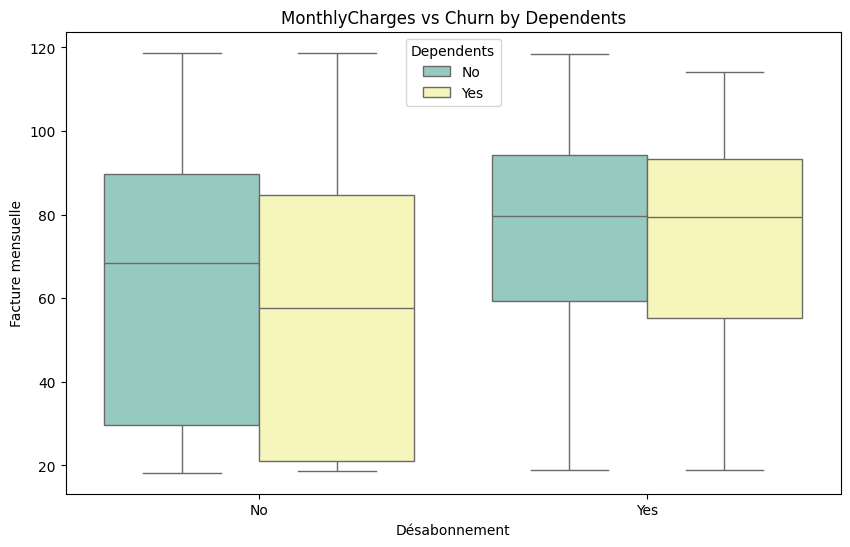

In [21]:
# MonthlyCharges VS Churn by Dependents (2)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', hue='Dependents', data=df, palette='Set3')
plt.title('MonthlyCharges vs Churn by Dependents')
plt.xlabel('Désabonnement')
plt.ylabel('Facture mensuelle') 
plt.show()

Passons au résumé statistique.

In [22]:
# Résumé statistique
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


On remarque que les trois variables quantitatives (***tenure, MonthlyCharges, TotalCharges***) ont différentes échelles. ***tenure*** varie entre 0 et 72 tansis que ***MonthlyCharges*** varie entre 18.25 et 118.75 et ***TotalCharges*** varie entre 18.8 et 8684.8. De nombreux modèles de Machine Learning et de Deep Learning fonctionnent mieux avec des variables standardisées ou normalisées.

Nous traiterons de la standardisation des données dans la section de prétraitement des données.

# Prétraitement des données

Cette phase dit prétraitement des données nous permet de néttoyer les données et  les préparer pour la phase de modélisation.

Commençons par la gestion des valeurs manquantes.

## 1. Gestion des valeurs manquantes

In [23]:
# Gestion des valeurs manquantes

data = df.copy() # Copie du DataFrame pour éviter de modifier l'original

data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [24]:
# Pourcentage de valeurs manquantes dans TotalCharges
#data['TotalCharges'].isna().mean() * 100
(11/7043)* 100  

0.1561834445548772

On retrouve 11 valeurs manquantes uniquemment dans la colonne **TotalCharges**. Ces 11 lignes des valeurs manquantes dans cette colonne représente 0.15% de la quantité totale des données (dont 7043). Donc en supprimant ces lignes, sans risque de perdre de l'information. 

In [25]:
# Suppression des lignes contenant des valeurs manquantes dans TotalCharges
#data = data.dropna(subset=['TotalCharges'])
data.dropna(inplace=True)
# Verification 
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

La deuxième chose que nous allons faire pour préparer les données  pour la modélisation est l'encodage des variables catégorielles.


## 2. Encodage des variables catégorielles

Les algorithmes de machine learning surtout ceux écrits dans la librairie Scikit-learn ne prenne pas des valeurs chaîne de caractère, ils ont besoins uniquement des valeurs numériques. Donc, il faudra nécessairement que nous encodons les variables catégorielles et que nous les transformons en variables numériques.

In [26]:
# Encodage des variables binaires
data['gender'] = data['gender'].apply(lambda row: 1 if row == 'female' else 0)  

binary_vars =  data.drop('gender', axis=1).nunique()[data.drop('gender', axis=1).nunique() == 2].keys().tolist()
binary_vars

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [27]:
for var in binary_vars:
    data[var] = data[var].apply(lambda row: 1 if row == 'Yes' else 0)

In [28]:
# Encodage des variables catégorielles restantes
remaining_categorical_vars = data[categorical_vars].nunique()[data[categorical_vars].nunique() > 2].keys().tolist()
remaining_categorical_vars_dummies = pd.get_dummies(data=data[remaining_categorical_vars], columns=remaining_categorical_vars, drop_first=True)

In [29]:
# Nouvelle dataframe
data = pd.concat([data['gender'], data[binary_vars], remaining_categorical_vars_dummies, data[numerical_vars]], axis=1)

In [30]:
# Affichage de la nouvelle dataframe
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,True,False,False,...,False,False,False,False,False,True,False,1,29.85,29.85
1,0,0,0,0,1,0,0,False,False,False,...,False,False,True,False,False,False,True,34,56.95,1889.50
2,0,0,0,0,1,1,1,False,False,False,...,False,False,False,False,False,False,True,2,53.85,108.15
3,0,0,0,0,0,0,0,True,False,False,...,False,False,True,False,False,False,False,45,42.30,1840.75
4,0,0,0,0,1,1,1,False,False,True,...,False,False,False,False,False,True,False,2,70.70,151.65


In [31]:
# Shape de la nouvelle dataframe
data.shape

(7032, 31)

In [32]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

Cest donc la dataframe ``data`` qui sera passé en modélisation.

Il y as beaucoup plus de variables maintenant (31 variables).

## 3. Transformation des variables asymétriques

Nous avons vu que la variable **TotalCharges** est très asymétrique alors transformons-la par une fonction racine carrée.

In [33]:
# Transformation de la variable 'TotalCharges'
data['TotalCharges'] = np.sqrt(data['TotalCharges'])

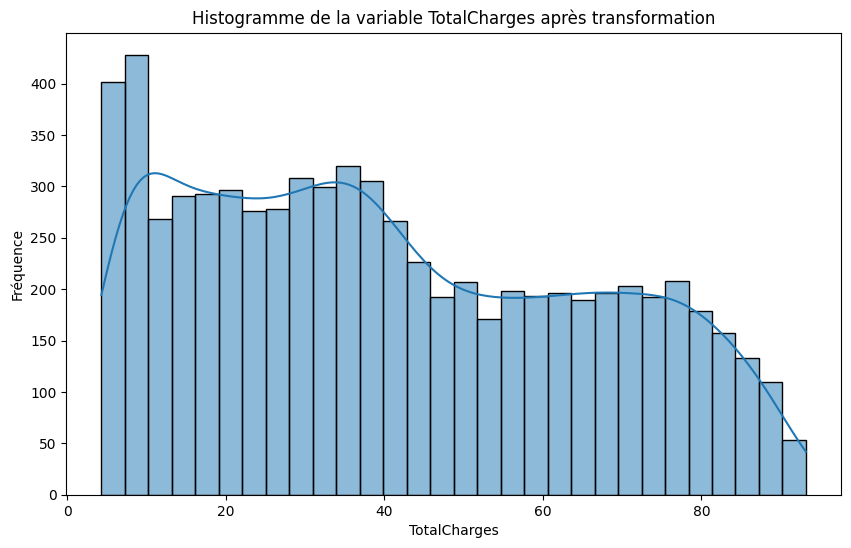

In [34]:
# Histogramme de la variable 'TotalCharges' après transformation
plt.figure(figsize=(10, 6))
sns.histplot(data['TotalCharges'], bins=30, kde=True)
plt.title('Histogramme de la variable TotalCharges après transformation')
plt.xlabel('TotalCharges')
plt.ylabel('Fréquence')
plt.show()

In [35]:
# Coefficient d'asymétrie de la variable 'TotalCharges' après transformation
data['TotalCharges'].skew()

np.float64(0.3089261418986736)

Passons maintenant à la division de notre ensemble de données en données d'entraînement, de validation, et de test.



## 4. Division de l'ensemble de données en ensembles d'entraînement, de validation et de test

In [36]:
# Données d'entraînement (60%), de validation (20%), et de test (20%)

X = data.drop('Churn', axis=1)
y = data['Churn']
seed = 111  # Pour la reproductibilité
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=seed, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed, stratify=y_temp)

Il faut s'assurer que les proportions de personnes ayant résilié ou non leur contrat soient les mêmes dans les différents ensemble de données. Cela grâce au paramètre ``stratify = y``

In [38]:
# Fréquence des classes dans y
print("Fréquence des classes dans y:")
print( pd.DataFrame(y).value_counts(normalize=True) )

Fréquence des classes dans y:
Churn
0        0.734215
1        0.265785
Name: proportion, dtype: float64


In [39]:
# Fréquence des classes dans y_train
print("Fréquence des classes dans y_train:")
print( pd.DataFrame(y_train).value_counts(normalize=True) )

Fréquence des classes dans y_train:
Churn
0        0.734297
1        0.265703
Name: proportion, dtype: float64


In [40]:
# Fréquence des classes dans y_val
print("Fréquence des classes dans y_val:")
print( pd.DataFrame(y_val).value_counts(normalize=True) )

Fréquence des classes dans y_val:
Churn
0        0.733997
1        0.266003
Name: proportion, dtype: float64


In [41]:
# Fréquence des classes dans y_test
print("Fréquence des classes dans y_test:")
print( pd.DataFrame(y_test).value_counts(normalize=True) )

Fréquence des classes dans y_test:
Churn
0        0.734186
1        0.265814
Name: proportion, dtype: float64


## 5. Gestion du déséquilibre de classes

Attaquons-nous maintenant au problème de déséquilibre de classe dans les données.

Lorsqu'il y a une très grande différence entre le nombre d'observation dans chaque catégorie de la variable cible à prédire, cela peut entraîner des erreurs de modélisation.

Dans notre cas ici, il y a un peu plus de 73% de personnes qui n'ont pas résilié leur abonnement contre environ un peu plus de 26% qui ont résilié leur abonnement. IL y a donc un grand déséquilibre de classe. Nous pouvons utiliser le rééchantillonnage pour créer plus d'équilibre entre les catégorie de la variable cible. Soit on crée plus d'observation dans la classe minoritaire (modalité 1) c'est-a-dire on fait un sur-échantillonnage, soit on diminue les observations de la classe majoritaire (modalité 0) c'est-à-dire un sous-échantillonnage.


In [42]:
# Résolution du problème de déséquilibre de classe : Méthode de sur-échantillonnage de la classe minoritaire

X2 = X_train.copy()
X2['Churn'] = y_train.values
minority_class = X2[X2['Churn'] == 1]
majority_class = X2[X2['Churn'] == 0]

minority_class_upsampled = resample(minority_class, 
                                    replace=True,     # Avec remplacement
                                    n_samples=len(majority_class), # Pour équilibrer les classes
                                    random_state=seed) # Pour la reproductibilité

upsampled = pd.concat([majority_class, minority_class_upsampled])

In [43]:
upsampled

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
2692,0,0,0,0,1,1,False,False,False,False,...,False,False,False,False,True,False,22,49.80,32.389041,0
664,0,0,1,1,1,0,False,False,False,True,...,False,False,True,False,False,False,57,19.50,34.170162,0
1027,0,0,0,0,1,0,False,True,True,False,...,False,True,False,True,False,False,47,94.90,67.935631,0
116,0,0,0,0,0,0,True,False,False,False,...,False,False,True,False,False,False,36,31.05,33.561138,0
4238,0,0,1,1,1,0,False,False,False,True,...,False,True,False,False,False,True,57,19.40,32.582204,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,0,0,1,0,1,1,False,True,True,False,...,True,False,False,False,True,False,10,86.65,29.268584,1
1772,0,0,0,0,1,0,False,False,True,False,...,False,False,False,False,True,False,2,79.00,11.985408,1
2124,0,0,1,0,0,1,True,False,False,False,...,False,False,False,False,True,False,5,24.95,10.019980,1
3384,0,0,1,1,1,1,False,False,True,False,...,False,False,False,False,True,False,4,73.75,18.040233,1


In [44]:
# Vérification

upsampled['Churn'].value_counts(normalize=True)

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

In [45]:
# Données d'entraînement sur la base de la méthode de sur-échantillonnage de la classe minoritaire

X_train_up = upsampled.drop('Churn', axis=1)
y_train_up = upsampled['Churn']

In [46]:
# Résolution du problème de déséquilibre de classe : Méthode de sous-échantillonnage de la classe majoritaire

majority_class_downsampled = resample(majority_class, 
                                      replace=False,    # Sans remplacement
                                        n_samples=len(minority_class), # Pour équilibrer les classes
                                        random_state=seed) # Pour la reproductibilité
downsampled = pd.concat([minority_class, majority_class_downsampled])

downsampled

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
1730,0,0,0,0,1,1,False,True,False,False,...,False,False,False,False,True,False,1,59.85,7.736278,1
3803,0,0,1,0,1,1,False,True,True,False,...,False,False,True,False,True,False,61,94.10,75.088614,1
5900,0,0,1,1,0,0,True,False,False,False,...,False,False,False,False,False,False,37,40.20,38.063105,1
3050,0,0,0,0,1,1,False,False,True,False,...,True,False,False,True,False,False,5,85.40,20.637345,1
2616,0,0,1,1,1,1,False,False,False,False,...,False,False,False,False,False,False,6,44.60,16.149303,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5096,0,0,1,1,1,0,False,True,False,False,...,True,False,True,False,False,False,71,86.85,79.144172,0
6627,0,0,1,0,1,0,False,False,False,True,...,False,True,False,False,False,True,59,20.35,35.594943,0
992,0,0,1,1,1,0,False,True,False,True,...,False,False,True,True,False,False,22,25.25,23.566926,0
363,0,0,0,0,1,1,False,False,False,True,...,False,False,True,False,False,True,47,20.55,30.752236,0


In [47]:
# Vérification

downsampled['Churn'].value_counts(normalize=True)

Churn
1    0.5
0    0.5
Name: proportion, dtype: float64

In [48]:
# Données d'entraînement sur labase de la méthode de sous-échantillonnage de la classe majoritaire

X_train_down = downsampled.drop('Churn', axis=1)
y_train_down = downsampled['Churn']

In [49]:
X_train

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
2692,0,0,0,0,1,1,False,False,False,False,...,False,False,False,False,False,True,False,22,49.80,32.389041
664,0,0,1,1,1,0,False,False,False,True,...,True,False,False,True,False,False,False,57,19.50,34.170162
1027,0,0,0,0,1,0,False,True,True,False,...,False,False,True,False,True,False,False,47,94.90,67.935631
116,0,0,0,0,0,0,True,False,False,False,...,False,False,False,True,False,False,False,36,31.05,33.561138
4238,0,0,1,1,1,0,False,False,False,True,...,True,False,True,False,False,False,True,57,19.40,32.582204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6443,0,0,0,0,1,0,False,False,False,True,...,True,False,False,False,False,False,False,9,19.50,12.261729
7010,0,0,1,0,1,1,False,True,True,False,...,False,False,False,False,False,True,False,1,74.45,8.628441
6062,0,0,0,0,1,1,False,False,True,False,...,False,False,False,False,True,False,False,53,73.80,63.275983
2232,0,0,1,1,1,0,False,False,False,True,...,True,False,False,True,True,False,False,36,19.45,27.468163


In [49]:
# y_train et X_train
#y_train = X_train['Churn']
#X_train = X_train.drop('Churn', axis=1)

In [50]:
# Définition des données d'entraînement
#Choix possibles : (X_train, y_train), (X_train_up, y_train_up), (X_train_down, y_train_down)


# On Choisit la variable d'entraînement par sur-échantillonnage de la classe minoritaire
train_features = X_train_up 
train_labels = y_train_up  

Passons finalement à la normalisation des données (dernière étape dans la phase de prétraitement de données)

## 6. Normalisation ou Standardisation des données

In [51]:
train_features.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
2692,0,0,0,0,1,1,False,False,False,False,...,False,False,False,False,False,True,False,22,49.80,32.389041
664,0,0,1,1,1,0,False,False,False,True,...,True,False,False,True,False,False,False,57,19.50,34.170162
1027,0,0,0,0,1,0,False,True,True,False,...,False,False,True,False,True,False,False,47,94.90,67.935631
116,0,0,0,0,0,0,True,False,False,False,...,False,False,False,True,False,False,False,36,31.05,33.561138
4238,0,0,1,1,1,0,False,False,False,True,...,True,False,True,False,False,False,True,57,19.40,32.582204


**Différences d'échelles des variables** : Les variables numériques dans un ensemble de données peuvent avoir des échelles très différentes. Ici, la variable "tenure" (durée de fidélité) peut varier de 0 à 72 mois, tandis que "TotalCharges" (montant total facturé) peut s'étendre de 18,80 à 8684. Les "MonthlyCharges" (frais mensuels) varient dans une gamme plus petite, de 18,25 à 118,75.

Cette différence d'échelle peut créer un biais dans les résultats des modèles. Si les variables ne sont pas mises à la même échelle, les algorithmes de Machine Learning pourraient accorder plus d'importance aux variables ayant de plus grandes valeurs numériques, simplement en raison de leur magnitude et non de leur pertinence réelle pour le problème.

Pour remédier à ce problème, on essaye de mettre les variables à la même échelle en faisant **la normalisation** ou **la standardisation** ou d'autres. L'une ou l'autre de ces méthodes nou permet donc de préparer les données avant la modélisation.

In [52]:
# Normalisation des variables indépendantes des différents ensembles de données
        # On peut choisir de standardiser au lieu de normaliser
        
scaler = MinMaxScaler()

mod_scaler = scaler.fit(train_features)

train_features = mod_scaler.transform(train_features)
X_val = mod_scaler.transform(X_val)
X_test = mod_scaler.transform(X_test)

# Retransformation en DataFrame
train_features = pd.DataFrame(train_features, columns=X.columns)
X_val = pd.DataFrame(X_val, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)       


In [53]:
# Vérifier que toutes les variables sont maintenant normalisées ie entre 0 et 1
train_features.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.295775,0.313373,0.315669
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.788732,0.010978,0.335715
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.647887,0.763473,0.715740
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.492958,0.126248,0.328861
4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.788732,0.009980,0.317843


In [54]:
train_features.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
count,6196.0,6196.0,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,...,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,0.0,0.0,0.443673,0.258877,0.901711,0.648644,0.098289,0.437863,0.526146,0.163977,...,0.163977,0.403486,0.172853,0.172531,0.187218,0.417366,0.200452,0.380839,0.494373,0.381471
std,0.0,0.0,0.496857,0.438053,0.297729,0.477432,0.297729,0.496164,0.499356,0.370284,...,0.370284,0.490636,0.378151,0.377872,0.390118,0.493164,0.400371,0.338999,0.287044,0.274408
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056338,0.270334,0.138039
50%,0.0,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.295775,0.561876,0.337908
75%,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.676056,0.720559,0.601192
max,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
train_features.describe().loc['min':'max']

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056338,0.270334,0.138039
50%,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.295775,0.561876,0.337908
75%,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.676056,0.720559,0.601192
max,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000


On a bien la même échelle pour toutes les variables, ce qui met fin à catte phase de prétraitement de données.

On peut donc passer à la modélisation.

# Modélisation 

Cette phase de modélisation pour le projet de prédiction du désabonnement client (Customer Churn) est l'étape où des algorithmes de Machine Learning sont utilisés pour construire un modèle capable de prédire quels clients sont susceptibles de se désabonner des services d'une entreprise, spécifiquement une entreprise de télécommunication dans ce projet.

L'objectif est de créer un modèle de classification qui peut automatiquement prédire si un client va se désabonner ou non. Cette prédiction est fondamentale pour les entreprises, car **le coût de rétention d'un client existant est bien inférieur à celui de l'acquisition d'un nouveau client**. En identifiant les clients à risque, l'entreprise peut lancer des campagnes marketing ciblées pour les fidéliser.

## 1. Choix de la Métrique d'Évaluation

**Quelle métrique choisir pour évaluer la performance des modèles?**

Faudrait comprendre au préalable ce qu'on appelle matrice de confusion.

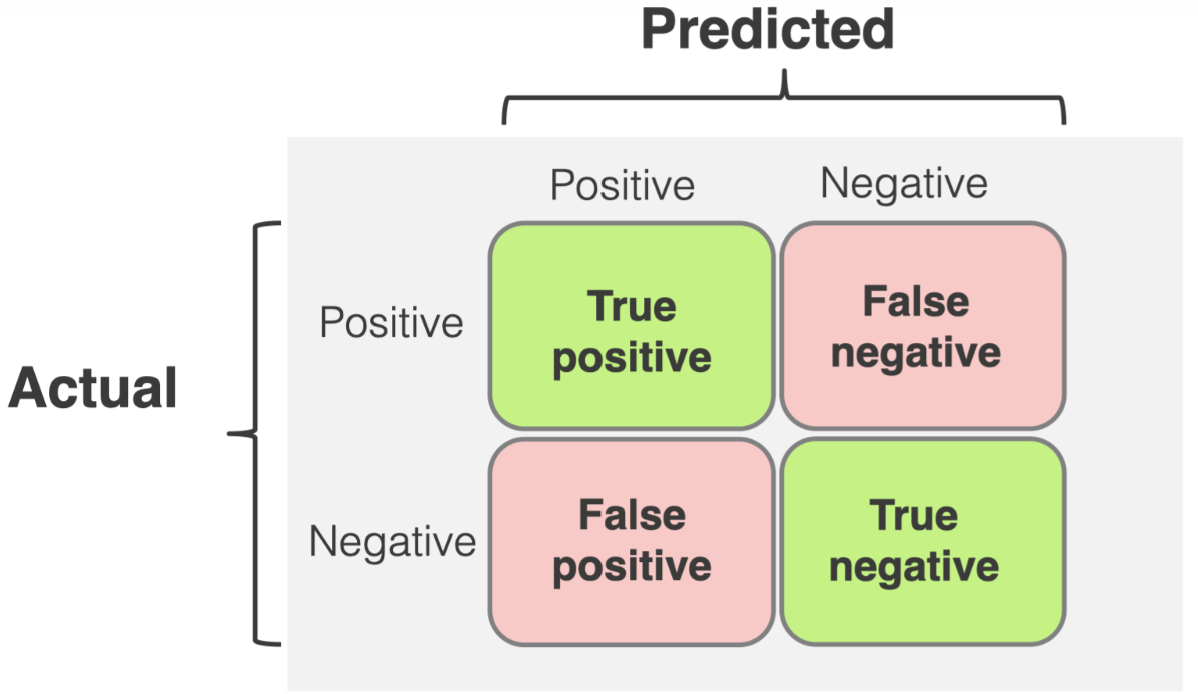



la matrice de confusion est un outil indispensable pour évaluer la performance des modèles de classification. C'est une matrice carrée qui rapporte le nombre de vrais positifs (*True Positives* ou TP), vrais négatifs (*True Négatives* ou TN), faux positifs (*False Positive* ou FP) et faux négatifs (*False Negatives* ou FN).

Dans notre cas, **le positif c'est 1 : le client s'est désabonné** et **le négatif c'est 0 : le client ne s'est pas désabonné** .

- **TP** : Le client s'est désabonné et le modèle prédit qu'il s'est désabonné;
- **TN** : Le client ne s'est pas désabonné et le modèle prédit qu'il ne s'est pas désabonné.

Les deux cas ci-dessus (TP et TN) sont les bons cas. Mais FP et FN sont les mauvais cas :
- **FP** : Le client ne s'est pas désabonné et le modèle prédit qu'il s'est désabonné;
- **FN** : Le client s'est désabonné et le modèle prédit qu'il ne s'est pas désabonné.


• Interprétation Visuelle :

    ◦ La diagonale (TP et TN) représente les prédictions correctes : plus les chiffres sur cette diagonale sont élevés, meilleur est le modèle.

    ◦ Les valeurs hors diagonale (FP et FN) représentent les erreurs de prédiction : plus ces chiffres sont élevés, pire est le modèle.


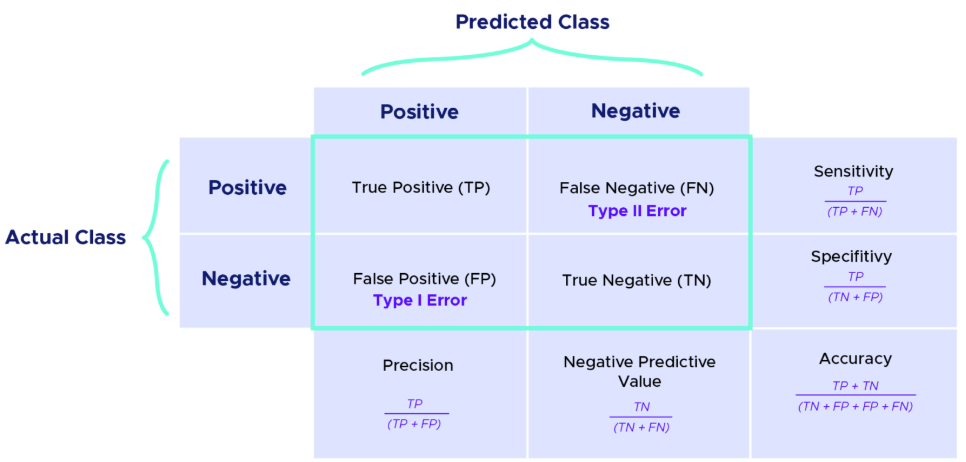

Les choix de métriques : [👉](https://scikit-learn.org/stable/api/sklearn.metrics.html)

**Métriques de classification** : ``accuracy_score``, ``f1_score``, ``precision_score``, ``recall_score``, etc.


- **accuracy**: L'exactitude, c'est la précision globale du modèle (***Accuracy*** en anglais) est la proportion de prévisions correctes, c'est-à-dire la somme du nombre de vrais négatifs et vrais positifs divisé par le nombre total des obserations. Elle se calcule donc par la formule ci-dessous:

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

Il faudrait faire attention à la précision globale. Une forte précision globale ne signifie pas forcément que le modèle est performant. Le choix de la métrique pour quantifier la performance du modèle doit se faire en fonction du contexte de l'étude, c'est-à-dire de la problématique qu'on veut résoudre.

Lorsqu'il y a un problème de déséquilibre de classe, la précision globale n'est pas une bonne métrique d'évaluation de la performance du modèle.

*precision* et *recall* sont des métriques très utilisées surtout lorsque les classes de la variable cible sont très déséquilibrées.

- **precision**: La précision est l'indicateur qui nous indique, sur tous les points positifs prédits, combien étaient de vrais positifs.
Proportion de prédictions positives correctes :

$Precision = \frac{TP}{TP + FP}$

- **recall**: cette métrique montre la capacité du modèle à identifier tous le vrais positifs.
Recall (Rappel ou Sensibilité) -> Proportion de vrais positifs détectés :

$Recall = \frac{TP}{TP + FN}$

L'amélioration de *precision* diminue *recall* et vice-versa. Alors que faire?

Fort heureusement, il y a une métrique qui contient à la fois la sensibilité et la spécificité. C'est le F1 score.

- **F1 score** : Moyenne harmonique de ***precision*** et de ***recall***. Elle se calcule donc par la formule:

$F1 Score = 2 * \frac{{Precision} * {Recall}}{{Precision} + {Recall}} = \frac{2TP}{2TP + FP + FN}$

Il est indispensable et incontournable de déterminer la métrique d'évaluation avant de commencer à entraîner les algorithmes.

Le choix de la métrique dépend du contexte spécifique de la problématique à résoudre (ex: détection de cancer, fraude bancaire). 

Pour ce problème de désabonnement client, le F1-score est considéré comme le plus pertinent.

Pour un modèle parfait, f1 score est égal à 1 et la plus mauvaise performance est un modèle avec un f1 score égal à 0.




**On choisit donc le F1 score pour évaluer la performance de chaque modèle qui sera construit.**

## 2. Sélection des Variables Prédictives (Feature Selection)

La Feature Selection est une étape cruciale avant l'entraînement des algorithmes, visant à optimiser le modèle.

L'objectif est de déterminer les meilleures variables prédictrices pour le modèle.

Toutes les variables ne sont pas importantes pour expliquer la variable cible (le désabonnement du client).

La sélection des variables permet de réduire le bruit dans les données et d'éviter le sur-ajustement (overfitting) du modèle.

De plus, cela améliore l'interprétabilité du modèle en réduisant la complexité due à un grand nombre de variables.

**Méthode 1 : Importance des Caractéristiques (Feature Importance) via Forêt Aléatoire (Random Forest)**

- Principe : 
Les modèles basés sur les arbres de décision, comme la Forêt Aléatoire, possèdent un attribut qui attribue une note d'importance à chaque variable prédictive.
- Implémentation :
  - Un modèle simple de Forêt Aléatoire (``RandomForestClassifier``) est entraîné sur les données d'entraînement (``train_features`` et ``train_labels``) sans chercher les meilleurs hyperparamètres pour l'instant.
  - Les scores d'importance des caractéristiques (``feature_importances_``) sont extraits et un tableau est créé pour visualiser l'importance de chaque variable.
  - Les variables sont classées par ordre décroissant d'importance.

In [56]:
# Selection des meilleures variables prédictives
rf = RandomForestClassifier()
rf.fit(train_features, train_labels)
print(classification_report(y_val, rf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1032
           1       0.57      0.51      0.54       374

    accuracy                           0.77      1406
   macro avg       0.70      0.68      0.69      1406
weighted avg       0.76      0.77      0.76      1406



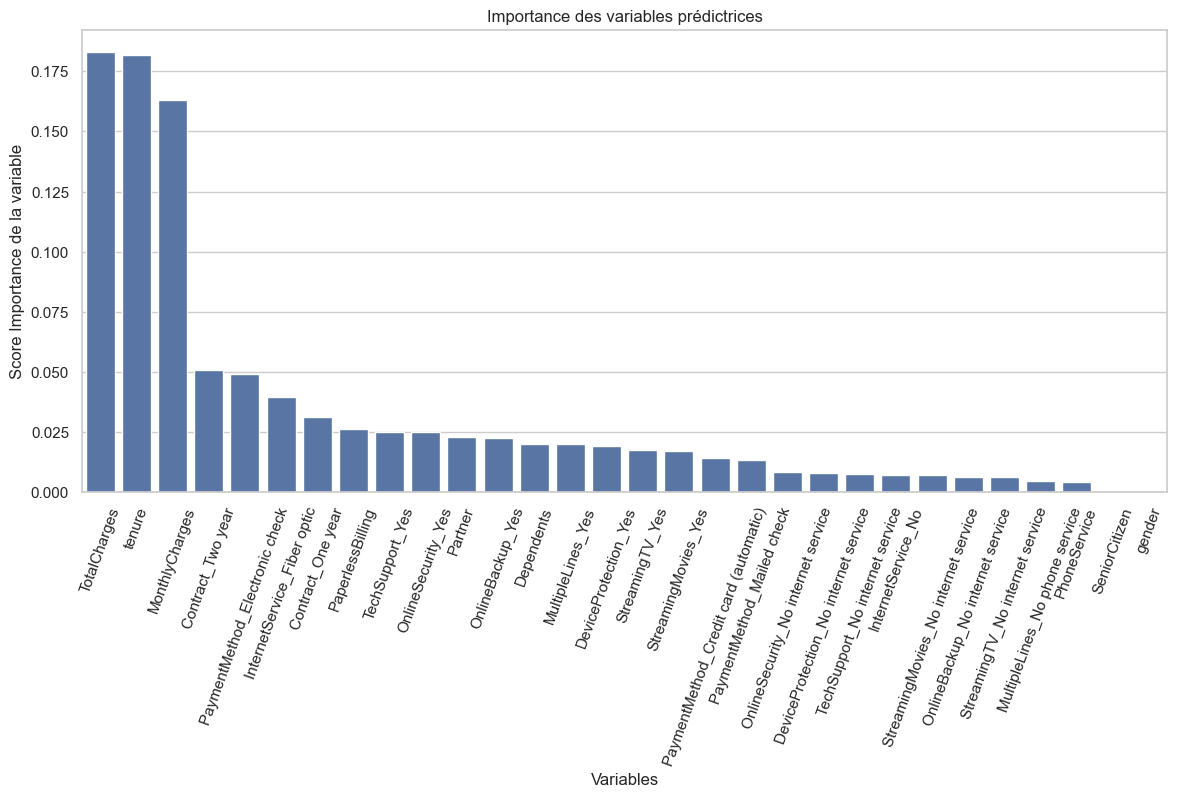

In [57]:
# Importance des variables indépendantes
vars_imp = pd.DataFrame({'Variable': train_features.columns, 'Importance': rf.feature_importances_})
vars_imp = vars_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(14, 6))
sns.set_theme(style="whitegrid")
sns.barplot(data=vars_imp, x='Variable', y='Importance')
plt.xticks(rotation=70)
plt.title('Importance des variables prédictrices')
plt.xlabel('Variables')
plt.ylabel('Score Importance de la variable')
plt.show()

On observe que : 

- Les variables **TotalCharges** (montant total facturé), **tenure** (ancienneté du client en mois) et **MonthlyCharges** (facture mensuelle) sont identifiées comme les plus importantes.

- Les variables **SeniorCitizen** et **gender** (sexe du client) ont une importance très faible, voire nulle, on suggère qu'elles n'ont pas un rôle significatif dans la prédiction du désabonnement, ie aucune relation avec la variable cible.

In [58]:
# Affichage des vars_imp
vars_imp.reset_index(drop=True, inplace=True)
vars_imp

,Variable,Importance
0,TotalCharges,0.183095
1,tenure,0.182022
2,MonthlyCharges,0.163113
3,Contract_Two year,0.050760
4,PaymentMethod_Electronic check,0.049142
5,InternetService_Fiber optic,0.039323
6,Contract_One year,0.031253
7,PaperlessBilling,0.026256
8,TechSupport_Yes,0.025092
9,OnlineSecurity_Yes,0.024954


La sélection des meilleurs variables prédictives est basée sur un Seuil :
- Pour éliminer les variables moins pertinentes qui n'ajouteraient que du bruit, un seuil est choisi.
- Seules les variables dont l'importance est supérieure à ce seuil sont conservées pour la modélisation.
- Ce processus conduit à la sélection d'un ensemble réduit de variables. Ce choix de seuil est flexible et peut être ajusté pour voir l'impact sur les résultats

In [59]:
# Variables sélectionnées pour les algorithmes
seuil = 0.004  # Seuil pour la sélection des variables
vars_selected = vars_imp[vars_imp['Importance'] > seuil]['Variable'].tolist()
print("Variables sélectionnées pour les algorithmes :", vars_selected)

Variables sélectionnées pour les algorithmes : ['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract_Two year', 'PaymentMethod_Electronic check', 'InternetService_Fiber optic', 'Contract_One year', 'PaperlessBilling', 'TechSupport_Yes', 'OnlineSecurity_Yes', 'Partner', 'OnlineBackup_Yes', 'Dependents', 'MultipleLines_Yes', 'DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check', 'OnlineSecurity_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'InternetService_No', 'StreamingMovies_No internet service', 'OnlineBackup_No internet service', 'StreamingTV_No internet service', 'MultipleLines_No phone service', 'PhoneService']


In [60]:
len(vars_selected)

28

On a donc 28 variables finales, après élimination de certaines.

In [61]:
# Mise à jour des données d'entraînement, de validation et de test pour contenir ces variables sélectionnées
train_features = train_features[vars_selected]
X_val = X_val[vars_selected]
X_test = X_test[vars_selected]
X_test = X_test[vars_selected]

**Méthode2 : Élimination Récursive de Caractéristiques (Recursive Feature Elimination - RFE)**

L'algorithme Recursive Feature Elimination (RFE) est aussi une méthode de selection de variables prédictives (Feature Selection). Elle vise à trouver le sous-ensemble de variables qui maintient ou améliore la performance d'un modèle tout en réduisant sa complexité.

On l'appliquera dans la suite à chaque modèle entrainé.

## 3. Entraînement, Évaluation  des modèles et Ajustement des Hyperparamètre

L'objectif principal de la modélisation est de construire un modèle de classification capable de prédire automatiquement si un client va se désabonner ou non.

Ce modèle permettra à l'entreprise de télécommunications de cibler les clients à risque avec des campagnes marketing spécifiques afin de les fidéliser, étant donné que le coût de rétention d'un client est bien inférieur au coût d'acquisition d'un nouveau client.

Plusieurs algorithmes de Machine Learning et un réseau de neurones artificiel (Deep Learning simple) seront entraînés afin de comparer leurs performances et de choisir le meilleur modèle.

Les algorithmes testés incluent :

- [Régression Logistique](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)  
- [Forêt Aléatoire (Random Forest)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  
- [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)  
- [Classificateur Perceptron Multicouche (MLP Classifier)](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) — un réseau de neurones artificiel simple  
- [Support Vector Machine (SVM)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

### 3.1 Entraînement et Évaluation de la Régression Logistique

In [62]:
# Dictionnaire des hyperparamètres 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 500],}

# Objet GridSearchCV
grid_logistic_class = GridSearchCV(estimator=LogisticRegression(random_state=seed, max_iter=500), 
                             param_grid=param_grid, 
                             scoring='f1', 
                             cv=5)

# Entrainement de l'algorithme
logistic_model = grid_logistic_class.fit(train_features, train_labels)

# Meilleur score et meilleur hyperparamètre
print("Meilleur score (f1) :", grid_logistic_class.best_score_)
print("Meilleur hyperparamètre (C) :", grid_logistic_class.best_params_)
print("Meilleur modèle :", logistic_model.best_estimator_)

Meilleur score (f1) : 0.7738064159917125
Meilleur hyperparamètre (C) : {'C': 10}
Meilleur modèle : LogisticRegression(C=10, max_iter=500, random_state=111)


Le modèle a un bon score d'entraînement. Evaluons sa performance sur les données de validation afin d'apprécier sa capacité à généraliser sur de nouvelles données.

In [63]:
# Fonction d'évaluation de la performance d'un modèle

def evaluate_model(model, features, labels):
    pred = model.predict(features)
    print(classification_report(labels, pred))
    
    # Matrice de confusion
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.crosstab(labels, pred, rownames=['Réel'], colnames=['Prédit']), annot=True, fmt='d', cmap='Blues')
    plt.title('Matrice de confusion')
    plt.show()

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1032
           1       0.53      0.75      0.62       374

    accuracy                           0.75      1406
   macro avg       0.71      0.75      0.72      1406
weighted avg       0.80      0.75      0.77      1406



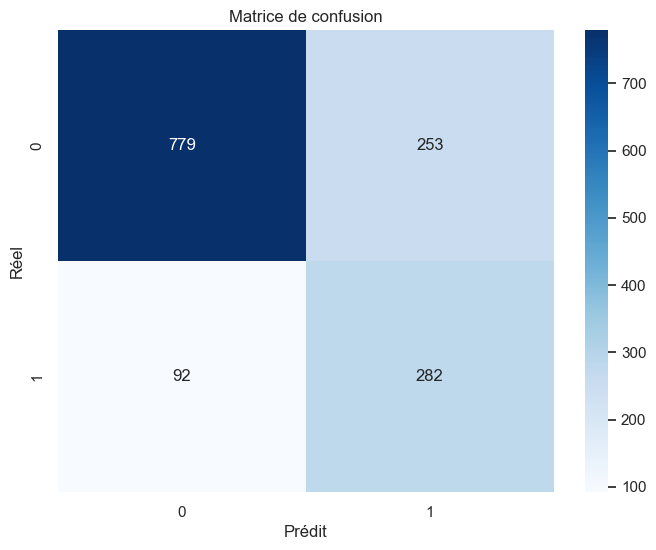

In [64]:
# Evaluation du modèle de régression logistique
evaluate_model(logistic_model.best_estimator_, X_val, y_val)

Pour la régression logistique, l'F1-score de la classe positive est de 0.62 et la précision globale (accuracy) est de 0.75.

Appliquons l'algorithme [Recursive Feature Elimination](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) (**RFE**) à la régression logistique pour réduire le nombre de variables prédictrices. En effet, plus le modèle est complexe, plus il est difficile de l'interpréter. 

In [65]:
# Création d'une fonction de construction d'un modèle avec utilisation de l'algorithme RFE
def build_model_with_rfe(model):
    rfe_model = RFE(estimator=model, verbose=0)
    rfe_model.fit(train_features, train_labels)
    mask = rfe_model.support_
    reduced_X = train_features.loc[:, mask]
    print(f"Les Variables sélectionnées par RFE : {reduced_X.columns.tolist()}")
    return rfe_model

In [66]:
# Logistic Regression avec RFE
rfe_logistic_model = build_model_with_rfe(logistic_model.best_estimator_)
rfe_logistic_model

Les Variables sélectionnées par RFE : ['TotalCharges', 'MonthlyCharges', 'Contract_Two year', 'PaymentMethod_Electronic check', 'InternetService_Fiber optic', 'Contract_One year', 'PaperlessBilling', 'MultipleLines_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'OnlineSecurity_No internet service', 'InternetService_No', 'StreamingMovies_No internet service', 'OnlineBackup_No internet service']


,estimator,LogisticRegre...dom_state=111)
,n_features_to_select,None
,step,1
,verbose,0
,importance_getter,'auto'
,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1


In [67]:
# Nombre de variables sélectionnées après avoir appliqué la RFE
print("Nombre de variables sélectionnées après RFE :", rfe_logistic_model.n_features_)

Nombre de variables sélectionnées après RFE : 14


              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1032
           1       0.52      0.75      0.62       374

    accuracy                           0.75      1406
   macro avg       0.71      0.75      0.72      1406
weighted avg       0.79      0.75      0.76      1406



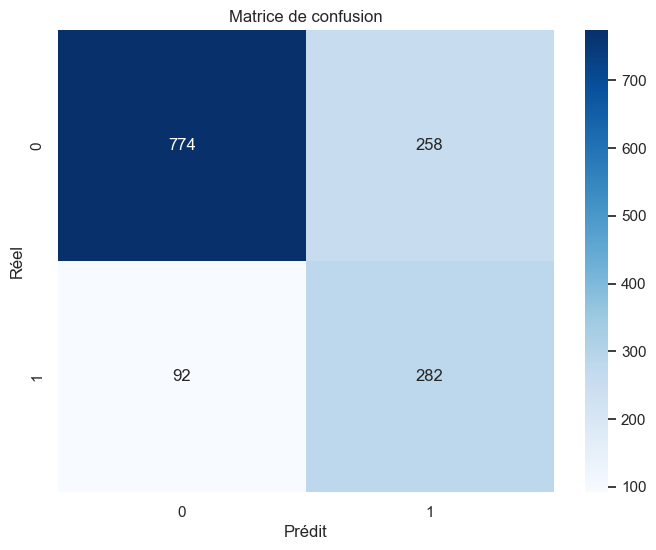

In [68]:
# Evaluation du modèle de régression logistique avec RFE
evaluate_model(rfe_logistic_model, X_val, y_val)

L'algorithme Recursive Feature Elimination (RFE) appliqué à la régression logistique, a réduit le nombre de variables prédictrices de 28 à 14. Bien que les valeurs du F1-score de la classe positive et la précision globale soient inchangés, le modèle avec 14 variables est **préférable pour son interprétabilité accrue** en raison de performances similaires.

### 3.2 Entraînement et Évaluation de la Forêt Aléatoire (Random Forest)

In [69]:
# Dictionnaire des hyperparamètres pour Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'max_depth': [3, 5, 10, 20, None]
}

# Objet GridSearchCV
grid_rf_class = GridSearchCV(estimator=RandomForestClassifier(random_state=seed), 
                             param_grid=param_grid_rf, 
                             scoring='f1', 
                             cv=5)

# Entrainement du modèle de Random Forest
rf_model = grid_rf_class.fit(train_features, train_labels)

# Meilleur score et meilleur hyperparamètre
print("Meilleur score (f1) :", round(rf_model.best_score_, 3))
print("Meilleur hyperparamètre (n_estimators, max_depth) :", rf_model.best_params_)
# Meilleur modèle
print("Meilleur modèle :", rf_model.best_estimator_)


Meilleur score (f1) : 0.914
Meilleur hyperparamètre (n_estimators, max_depth) : {'max_depth': None, 'n_estimators': 50}
Meilleur modèle : RandomForestClassifier(n_estimators=50, random_state=111)


              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1032
           1       0.57      0.49      0.53       374

    accuracy                           0.76      1406
   macro avg       0.70      0.68      0.69      1406
weighted avg       0.76      0.76      0.76      1406



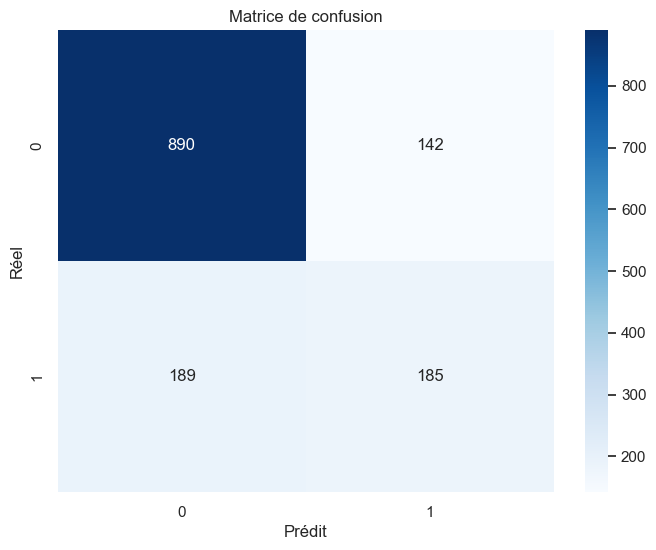

In [70]:
# Evaluation du modèle de fôrêt aléatoire
evaluate_model(rf_model.best_estimator_, X_val, y_val)

Comparé aux valeurs du modèle de régression logistique, le modèle de forêt aléatoire semble moins éfficace.

Appliquons la RFE

In [71]:
# Random Forest avec RFE
rfe_rf_model = build_model_with_rfe(rf_model.best_estimator_)
rfe_rf_model

Les Variables sélectionnées par RFE : ['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract_Two year', 'PaymentMethod_Electronic check', 'InternetService_Fiber optic', 'Contract_One year', 'PaperlessBilling', 'TechSupport_Yes', 'OnlineSecurity_Yes', 'Partner', 'OnlineBackup_Yes', 'Dependents', 'StreamingMovies_No internet service']


,estimator,RandomForestC...dom_state=111)
,n_features_to_select,None
,step,1
,verbose,0
,importance_getter,'auto'
,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1032
           1       0.58      0.51      0.54       374

    accuracy                           0.77      1406
   macro avg       0.70      0.69      0.69      1406
weighted avg       0.76      0.77      0.76      1406



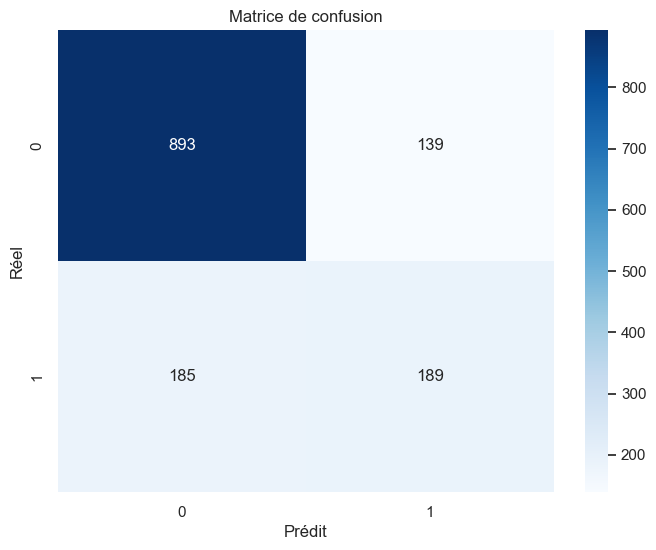

In [72]:
# Evaluation du modèle de forest aléatoire
evaluate_model(rfe_rf_model, X_val, y_val)

Au vue de ces valeurs, nous retiendrons le modèle de forêt aléatoire obtenu sans RFE.

Passons à la construction d'un modèle de réseau de neuronnes artificiel.

### 3.3 Entraînement et Évaluation du Classificateur Perceptron Multicouche (MLP Classifier)

In [73]:
# MLPClassifier
mlp = MLPClassifier(random_state=seed, max_iter=1000)
# Dictionnaire des hyperparamètres pour MLPClassifier
param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (200,)],
                    #'activation': ['identity', 'logistic', 'tanh', 'relu'],
                    #'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                    'learning_rate': ['constant', 'invscaling', 'adaptive']}

# Objet GridSearchCV
grid_mlp_class = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, 
                             scoring='f1', cv=5, n_jobs=1)

# Entrainement du modèle de MLPClassifier
mlp_model = grid_mlp_class.fit(train_features, train_labels)

In [79]:
# Meilleur score et meilleur hyperparamètre
print("Meilleur score (f1) :", round(mlp_model.best_score_, 3))
print("Meilleur hyperparamètre (hidden_layer_sizes, activation, alpha, learning_rate) :", mlp_model.best_params_)

Meilleur score (f1) : 0.848
Meilleur hyperparamètre (hidden_layer_sizes, activation, alpha, learning_rate) : {'hidden_layer_sizes': (200,), 'learning_rate': 'constant'}


              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1032
           1       0.48      0.62      0.54       374

    accuracy                           0.72      1406
   macro avg       0.66      0.69      0.67      1406
weighted avg       0.75      0.72      0.73      1406



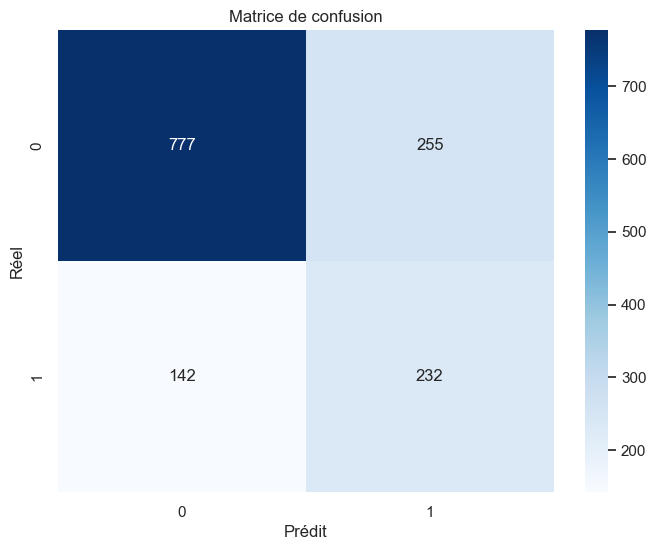

In [80]:
# Evaluation du modèle Perceptron
evaluate_model(mlp_model.best_estimator_, X_val, y_val)

Passons maintenant à un modèle SVM

### 3.4 Entraînement et Évaluation du Support Vector Machine (SVM)

In [76]:
from sklearn.svm import SVC

In [ ]:
# SVM : Classifieur qui trouve l'hyperplan optimal qui maximise la frontière entre 2 classes
svm = SVC(random_state=seed, probability=True)

# Dictionnaire des hyperparamètres pour SVM
param_grid_svm = {'C': [0.01, 0.1, 1, 10, 50, 100],
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                   # 'gamma': ['scale', 'auto'],
                   # 'degree': [2, 3, 4, 5]
                   }
# Objet GridSearchCV
grid_svm_class = GridSearchCV(estimator=svm, param_grid=param_grid_svm, 
                             scoring='f1', cv=5)
# Entrainement du modèle SVM
svm_model = grid_svm_class.fit(train_features, train_labels)

: 

: 

: 

In [334]:
# Meilleur score et meilleur hyperparamètre
print("Meilleur score (f1) :", round(svm_model.best_score_, 3))
print("Meilleur hyperparamètre (C, kernel) :", svm_model.best_params_)
# meilleur modèle
print("Meilleur modèle :", svm_model.best_estimator_)

Meilleur score (f1) : 0.853
Meilleur hyperparamètre (C, kernel) : {'C': 500, 'kernel': 'rbf'}
Meilleur modèle : SVC(C=500, probability=True, random_state=111)


              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1032
           1       0.46      0.60      0.52       374

    accuracy                           0.70      1406
   macro avg       0.65      0.67      0.65      1406
weighted avg       0.74      0.70      0.72      1406



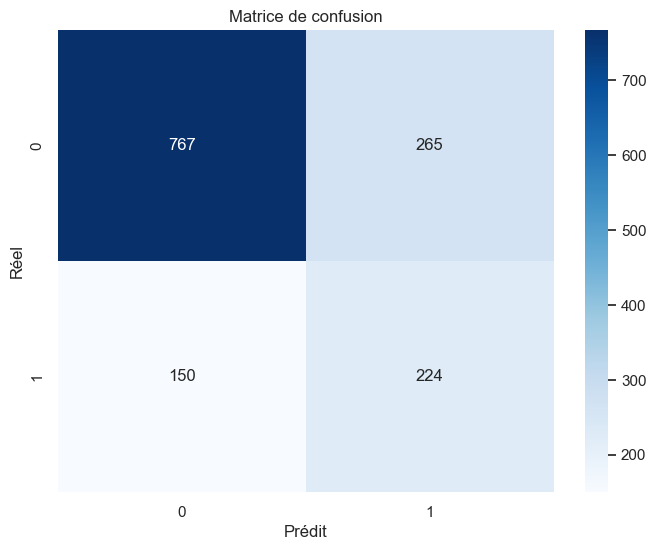

In [336]:
# Evaluation du modèle SVM
evaluate_model(svm_model.best_estimator_, X_val, y_val)

## 4. Sélection du Meilleur Modèle

## Observations sur les résultats de modélisation

- **Métrique**
  - L’usage du `F1-score` (classe positive) est pertinent vu le déséquilibre de `Churn` (~27% Yes).
- **Stratégie d’échantillonnage**
  - Sur‑échantillonnage appliqué uniquement au train, validation/test non modifiés → limite la fuite d’information.
- **Régression Logistique (RL)**
  - Meilleur `C=10` (GridSearchCV, cv=5). Sur validation: `F1` classe positive ≈ 0.62, `accuracy` ≈ 0.75.
  - Modèle interprétable; coefficients exploitables pour l’action marketing.
  - `RFE` réduit ~31→14 variables sans perte notable → meilleure lisibilité et moindre risque d’overfitting.
- **Random Forest / MLP / SVM (selon essais du projet)**
  - F1 (classe positive) sur validation plus faibles (RF ~0.54, MLP ~0.56, SVM ~0.51).
  - RF présente un écart entraînement/validation élevé (F1 train >0.9) → **overfitting** probable. Pistes: régulariser (`max_depth`, `min_samples_leaf`, `max_features`) et/ou `class_weight='balanced'`.
  - MLP/SVM sensibles au **scaling** et à la grille. Pistes: `StandardScaler` vs `MinMaxScaler`, grilles plus fines (SVM: `C`, `gamma`; MLP: tailles de couches, `alpha`, `learning_rate`).
- **Variables influentes**
  - Alignées avec l’AED: `Tenure`, `MonthlyCharges`, `TotalCharges`, ainsi que `Contract_*` et `PaymentMethod_* (Electronic check)`.
- **Généralisation**
  - La cohérence validation→test (F1 ≈ 0.62→0.64 pour la RL) indique une bonne capacité de généralisation.

## Conclusion de la partie modélisation

- **Bilan**
  - La **Régression Logistique** offre le meilleur compromis performance/interprétabilité avec un **F1 (classe positive) ≈ 0.62–0.64** et une **accuracy ≈ 0.75**, cohérents entre validation et test.
  - La **réduction de variables via RFE** (≈14 features) maintient les performances tout en améliorant l’explicabilité et la robustesse.
- **Améliorations potentielles** (avant décision finale)
  - Comparer `StandardScaler` vs `MinMaxScaler` pour SVM/MLP.
  - Tester `class_weight='balanced'` (LR, SVM, RF) en alternative à l’oversampling.
  - Affiner les grilles d’hyperparamètres (RF: `max_depth`, `min_samples_leaf`, `max_features`; SVM: `C`, `gamma`; MLP: tailles de couches, `alpha`, `learning_rate`).

---

## Transition: Sélection du meilleur modèle

À ce stade, la **Régression Logistique** est le candidat principal. La prochaine étape consiste à:
- Consolider la comparaison finale (tableau récapitulatif des métriques sur validation).
- Geler le meilleur modèle et l’**évaluer sur le jeu de test** (déjà indicatif dans le README) pour confirmer la généralisation.
- Sauvegarder le pipeline (encodage/transformations + modèle) pour réutilisation.

In [ ]:
# Tableau récapitulatif des métriques sur le jeu de validation
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Récupérer les meilleurs estimateurs si disponibles
models_val = []

# Fonction pour ajouter une ligne au tableau récapitulatif
def add_model_row(name, estimator, X, y):
    try:
        y_pred = estimator.predict(X)
        row = {
            'modele': name,
            'accuracy': accuracy_score(y, y_pred),
            'precision_pos': precision_score(y, y_pred, pos_label=1),
            'recall_pos': recall_score(y, y_pred, pos_label=1),
            'f1_pos': f1_score(y, y_pred, pos_label=1)
        }
        models_val.append(row)
    except Exception as e:
        print(f"[WARN] Impossible de calculer les métriques pour {name}: {e}")

# Ajout des lignes pour chaque modèle entraîné via GridSearchCV
try:
    add_model_row('LogisticRegression', logistic_model.best_estimator_, X_val, y_val)
except Exception as e:
    print('[WARN] logistic_model indisponible:', e)

try:
    add_model_row('RandomForest', rf_model.best_estimator_, X_val, y_val)
except Exception as e:
    print('[WARN] rf_model indisponible:', e)

try:
    add_model_row('MLPClassifier', mlp_model.best_estimator_, X_val, y_val)
except Exception as e:
    print('[WARN] mlp_model indisponible:', e)

try:
    add_model_row('SVM', svm_model.best_estimator_, X_val, y_val)
except Exception as e:
    print('[WARN] svm_model indisponible:', e)

summary_val = pd.DataFrame(models_val).sort_values(by='f1_pos', ascending=False)
summary_val.reset_index(drop=True, inplace=True)
summary_val

In [ ]:
# Évaluation finale sur le jeu de test (Régression Logistique) et sauvegarde du pipeline
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import joblib

best_lr = None
try:
    best_lr = logistic_model.best_estimator_
except Exception:
    pass

if best_lr is not None:
    y_pred_test = best_lr.predict(X_test)
    test_metrics = {
        'accuracy': accuracy_score(y_test, y_pred_test),
        'precision_pos': precision_score(y_test, y_pred_test, pos_label=1),
        'recall_pos': recall_score(y_test, y_pred_test, pos_label=1),
        'f1_pos': f1_score(y_test, y_pred_test, pos_label=1)
    }
    display(pd.DataFrame([test_metrics], index=['LogisticRegression_test']))

    pipeline_bundle = {
        'feature_names': list(X_test.columns),
        'scaler': mod_scaler,
        'model': best_lr
    }
    joblib.dump(pipeline_bundle, 'model_pipeline.joblib')
    print('Pipeline sauvegardé dans model_pipeline.joblib')
else:
    print('best logistic model indisponible')

In [ ]:
# Exemple d’utilisation de predict_from_dataframe avec des données brutes
# (simulateur avec 3 clients)

example = pd.DataFrame([
    {
        'customerID':'0001-TEST', 'gender':'Female','SeniorCitizen':0,'Partner':'Yes','Dependents':'No',
        'tenure':5,'PhoneService':'Yes','MultipleLines':'No','InternetService':'DSL','OnlineSecurity':'No',
        'OnlineBackup':'No','DeviceProtection':'No','TechSupport':'No','StreamingTV':'No','StreamingMovies':'No',
        'Contract':'Month-to-month','PaperlessBilling':'Yes','PaymentMethod':'Electronic check',
        'MonthlyCharges':75.2,'TotalCharges':'340.5'
    },
    {
        'customerID':'0002-TEST', 'gender':'Male','SeniorCitizen':1,'Partner':'No','Dependents':'No',
        'tenure':1,'PhoneService':'Yes','MultipleLines':'Yes','InternetService':'Fiber optic','OnlineSecurity':'No',
        'OnlineBackup':'No','DeviceProtection':'No','TechSupport':'No','StreamingTV':'Yes','StreamingMovies':'Yes',
        'Contract':'Month-to-month','PaperlessBilling':'Yes','PaymentMethod':'Electronic check',
        'MonthlyCharges':99.9,'TotalCharges':'99.9'
    },
    {
        'customerID':'0003-TEST', 'gender':'Female','SeniorCitizen':0,'Partner':'Yes','Dependents':'Yes',
        'tenure':48,'PhoneService':'No','MultipleLines':'No phone service','InternetService':'DSL','OnlineSecurity':'Yes',
        'OnlineBackup':'Yes','DeviceProtection':'Yes','TechSupport':'Yes','StreamingTV':'No','StreamingMovies':'No',
        'Contract':'Two year','PaperlessBilling':'No','PaymentMethod':'Mailed check',
        'MonthlyCharges':45.0,'TotalCharges':'2200.0'
    }
])

try:
    preds_example = predict_from_dataframe(example)
    display(pd.concat([example[['customerID','Contract','MonthlyCharges','TotalCharges']], preds_example], axis=1))
except Exception as e:
    print('Exécution de l’exemple impossible:', e)
